# Day 01 — Embeddings Clustering

This notebook is made to generate sentences, create embeddings, group them into clusters, and visualize the result.
I am doing this to understand how embeddings and clustering work.



In [1]:
# basic imports needed for this task
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [2]:
# generating 100 simple sentences
sentences = []

for i in range(100):
    sentences.append(f"This is sample sentence number {i+1}")

print("Total sentences created:", len(sentences))
print(sentences[:5])  # preview first 5 sentences



Total sentences created: 100
['This is sample sentence number 1', 'This is sample sentence number 2', 'This is sample sentence number 3', 'This is sample sentence number 4', 'This is sample sentence number 5']


In [3]:
# creating mock embeddings for each sentence
# using random numbers to simulate embeddings

embedding_size = 50  # simple embedding dimension
embeddings = np.random.rand(len(sentences), embedding_size)

print("Embeddings shape:", embeddings.shape)



Embeddings shape: (100, 50)


In [4]:
# clustering embeddings into 3 groups using KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(embeddings)

print("Cluster labels for first 10 sentences:")
print(labels[:10])



Cluster labels for first 10 sentences:
[2 2 1 0 2 0 2 2 0 1]


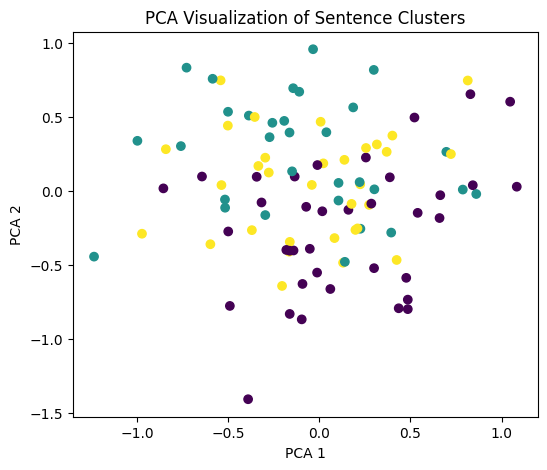

In [5]:
# reducing embeddings to 2D using PCA for visualization

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# plotting clusters
plt.figure(figsize=(6, 5))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels)
plt.title("PCA Visualization of Sentence Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()



In [6]:
# picking one representative sentence from each cluster

representatives = {}

for cluster_id in range(3):
    # find first sentence that belongs to this cluster
    for i, label in enumerate(labels):
        if label == cluster_id:
            representatives[str(cluster_id)] = sentences[i]
            break

print("Representative sentences per cluster:")
for k, v in representatives.items():
    print(f"Cluster {k}: {v}")



Representative sentences per cluster:
Cluster 0: This is sample sentence number 4
Cluster 1: This is sample sentence number 3
Cluster 2: This is sample sentence number 1


In [7]:
# saving sentences to CSV
sent_df = pd.DataFrame({"sentence": sentences})
sent_df.to_csv("data/sentences.csv", index=False)

# saving embeddings to NPY file
np.save("data/embeddings_100.npy", embeddings)

# saving cluster labels to JSON
labels_dict = {str(i): int(label) for i, label in enumerate(labels)}
with open("data/labels.json", "w") as f:
    import json
    json.dump(labels_dict, f, indent=2)

# saving representatives to JSON
with open("data/representatives.json", "w") as f:
    json.dump(representatives, f, indent=2)

# saving PCA plot image
plt.figure(figsize=(6, 5))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels)
plt.title("PCA Visualization of Sentence Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.savefig("plot.png")
plt.close()

print("All output files saved successfully.")



All output files saved successfully.
